<a href="https://colab.research.google.com/github/SchneiderSix/Machine-Learning---Zoomcamp/blob/main/ml_zoomcamp/hw8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow scikit-learn xgboost

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

In [13]:
!unzip -q /content/hair-data -d /content/datasets

In [4]:
SEED = 42

np.random.seed(SEED)
tf.random.set_seed(SEED)

In [5]:
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models

model2 = models.Sequential()

model2.add(
    layers.Input(shape=(200, 200, 3))
)
model2.add(
    layers.Conv2D(
        32, (3, 3), activation='relu'
    )
)
model2.add(
    layers.MaxPooling2D(
        pool_size=(2, 2)
    )
)
model2.add(
    layers.Flatten()
)
model2.add(
    layers.Dense(
        64, activation='relu'
    )
)
model2.add(
    layers.Dense(
        1, activation='sigmoid'
    )
)

model2.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.SGD(
        learning_rate=0.002,
        momentum=0.8
    ),
    metrics=['accuracy']
)

In [30]:
# input layer
inputs = tf.keras.Input(
    shape=(200, 200, 3),
)

# convolutional layer
base = tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=(3, 3),
    activation='relu',
)(inputs)

# downsample the input dimensions
pooling = tf.keras.layers.MaxPool2D(
    pool_size=(2, 2),
)(base)

# turn multi-dimensional result into vectors
vectors = tf.keras.layers.Flatten()(pooling)

# adding inner layer
dense = tf.keras.layers.Dense(
    units=64,
    activation='relu',
)(vectors)

# output layer
outputs = tf.keras.layers.Dense(
    units=1,
    activation='sigmoid',
)(dense)

# optimizer
optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.002,
    momentum=0.8
)

# loss function
loss = tf.keras.losses.BinaryCrossentropy(
    from_logits=True
)

# compile model
model = tf.keras.Model(
    inputs=inputs,
    outputs=outputs,
)

model.compile(
    optimizer,
    loss,
    metrics=['accuracy']
)

Since we have a binary classification problem, what is the best loss function for us?

binary crossentropy

In [7]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 313632)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │      20,072,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,073,473 (76.57 MB)

 Trainable params: 20,073,473 (76.57 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 313632)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │      20,072,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,073,473 (76.57 MB)

 Trainable params: 20,073,473 (76.57 MB)

 Non-trainable params: 0 (0.00 B)

What's the total number of parameters of the model? You can use the summary method for that.

20,073,473

In [31]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

train_ds = train_gen.flow_from_directory(
    '/content/datasets/data/train',
    class_mode='binary',
    batch_size=20,
    target_size=(200, 200),
    #shuffle=True
)

test_ds = test_gen.flow_from_directory(
    '/content/datasets/data/test',
    class_mode='binary',
    batch_size=20,
    target_size=(200, 200),
    #shuffle=True
)

Found 800 images belonging to 2 classes.
Found 201 images belonging to 2 classes.


In [32]:
results = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:707: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 180ms/step - accuracy: 0.5289 - loss: 0.7341 - val_accuracy: 0.5871 - val_loss: 0.6629
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 135ms/step - accuracy: 0.6519 - loss: 0.6322 - val_accuracy: 0.6318 - val_loss: 0.6227
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 155ms/step - accuracy: 0.6869 - loss: 0.5865 - val_accuracy: 0.5423 - val_loss: 0.8191
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 188ms/step - accuracy: 0.6285 - loss: 0.6401 - val_accuracy: 0.6617 - val_loss: 0.6393
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 147ms/step - accuracy: 0.7079 - loss: 0.5423 - val_accuracy: 0.6517 - val_loss: 0.6202
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 167ms/step - accuracy: 0.7256 - loss: 0.5261 - val_accuracy: 0.6517 - val_loss: 0.6025
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 150ms/step - accuracy: 0.7506 - loss: 0.5183 - val_accuracy: 0.6716 - val_loss: 0.5895
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 141ms/step - accuracy: 0.7402 - loss: 0.5006 - val_accuracy: 0.6368 - v

In [36]:
np.median(results.history["accuracy"]).round(3)

0.704

In [37]:
np.std(results.history["loss"]).round(3)

0.07

In [38]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_ds = train_gen.flow_from_directory(
    '/content/datasets/data/train',
    class_mode='binary',
    batch_size=20,
    target_size=(200, 200),
    #shuffle=True
)

test_ds = test_gen.flow_from_directory(
    '/content/datasets/data/test',
    class_mode='binary',
    batch_size=20,
    target_size=(200, 200),
    #shuffle=True
)

Found 800 images belonging to 2 classes.
Found 201 images belonging to 2 classes.


re train current model

In [40]:
results = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 343ms/step - accuracy: 0.7583 - loss: 0.5331 - val_accuracy: 0.6766 - val_loss: 0.5993
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 374ms/step - accuracy: 0.7026 - loss: 0.5667 - val_accuracy: 0.7562 - val_loss: 0.5616
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 338ms/step - accuracy: 0.7305 - loss: 0.5404 - val_accuracy: 0.6766 - val_loss: 0.5960
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 334ms/step - accuracy: 0.7456 - loss: 0.5343 - val_accuracy: 0.6766 - val_loss: 0.5834
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 337ms/step - accuracy: 0.7257 - loss: 0.5383 - val_accuracy: 0.7164 - val_loss: 0.5713
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 339ms/step - accuracy: 0.7237 - loss: 0.5368 - val_accuracy: 0.7662 - val_loss: 0.5393
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 331ms/step - accuracy: 0.7349 - loss: 0.5304 - val_accuracy: 0.6915 - val_loss: 0.5670
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 333ms/step - accuracy: 0.7147 - loss: 0.5376 - val_accu

In [41]:
np.mean(results.history["loss"]).round(3)

0.548

In [42]:
np.average(
    results.history["val_accuracy"][-5:]
).round(3)

0.713

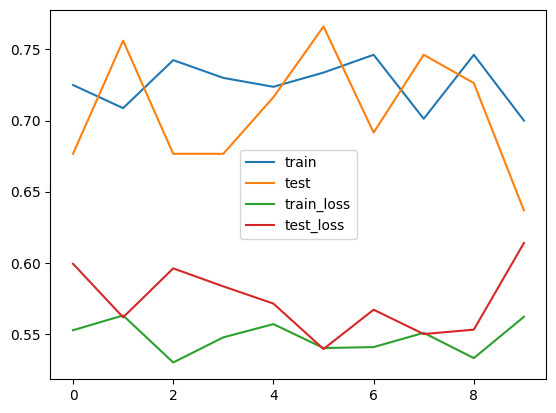

In [45]:
plt.plot(results.history['accuracy'], label='train')
plt.plot(results.history['val_accuracy'], label='test')
plt.plot(results.history['loss'], label='train_loss')
plt.plot(results.history['val_loss'], label='test_loss')
plt.legend()